<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Filling-Nulls" data-toc-modified-id="Filling-Nulls-0.0.0.1"><span class="toc-item-num">0.0.0.1&nbsp;&nbsp;</span>Filling Nulls</a></span></li></ul></li></ul></li><li><span><a href="#How-does-the-sentiment-of-the-question-affect-it's-liklihood-of-being-answered?" data-toc-modified-id="How-does-the-sentiment-of-the-question-affect-it's-liklihood-of-being-answered?-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>How does the sentiment of the question affect it's liklihood of being answered?</a></span></li><li><span><a href="#How-does-the-sentiment-of-the-answer-affect-the-score-the-answer-recieves?" data-toc-modified-id="How-does-the-sentiment-of-the-answer-affect-the-score-the-answer-recieves?-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>How does the sentiment of the answer affect the score the answer recieves?</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Instantiating-SentimentInsensityAnalyzer()-and-Creating-a-Function-get_compound_sentiment()" data-toc-modified-id="Instantiating-SentimentInsensityAnalyzer()-and-Creating-a-Function-get_compound_sentiment()-0.2.0.1"><span class="toc-item-num">0.2.0.1&nbsp;&nbsp;</span>Instantiating SentimentInsensityAnalyzer() and Creating a Function get_compound_sentiment()</a></span></li><li><span><a href="#Creating-a-columns-with-sentiment-scores" data-toc-modified-id="Creating-a-columns-with-sentiment-scores-0.2.0.2"><span class="toc-item-num">0.2.0.2&nbsp;&nbsp;</span>Creating a columns with sentiment scores</a></span></li><li><span><a href="#Graphing-Answers-Sentmient-Scores:" data-toc-modified-id="Graphing-Answers-Sentmient-Scores:-0.2.0.3"><span class="toc-item-num">0.2.0.3&nbsp;&nbsp;</span>Graphing Answers Sentmient Scores:</a></span></li><li><span><a href="#Graphing-Questions-Sentiment-Scores" data-toc-modified-id="Graphing-Questions-Sentiment-Scores-0.2.0.4"><span class="toc-item-num">0.2.0.4&nbsp;&nbsp;</span>Graphing Questions Sentiment Scores</a></span></li><li><span><a href="#Graphing-the-Distribution-Scores-from-the-Questions" data-toc-modified-id="Graphing-the-Distribution-Scores-from-the-Questions-0.2.0.5"><span class="toc-item-num">0.2.0.5&nbsp;&nbsp;</span>Graphing the Distribution Scores from the Questions</a></span></li><li><span><a href="#Graphing-the-Distribution-of-the-Scores-from-Questions" data-toc-modified-id="Graphing-the-Distribution-of-the-Scores-from-Questions-0.2.0.6"><span class="toc-item-num">0.2.0.6&nbsp;&nbsp;</span>Graphing the Distribution of the Scores from Questions</a></span></li><li><span><a href="#Checking-the-distribution-of-answers-that-were-and-were-not-answered" data-toc-modified-id="Checking-the-distribution-of-answers-that-were-and-were-not-answered-0.2.0.7"><span class="toc-item-num">0.2.0.7&nbsp;&nbsp;</span>Checking the distribution of answers that were and were not answered</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Viewing-the-correlation-of-the-numeric-columns-to-qa_match" data-toc-modified-id="Viewing-the-correlation-of-the-numeric-columns-to-qa_match-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Viewing the correlation of the numeric columns to <code>qa_match</code></a></span><ul class="toc-item"><li><span><a href="#-It'd-be-interesting-to-see-if-the-tags-the-professionals-use-are-the-tags-that-the-questions-get-answered" data-toc-modified-id="-It'd-be-interesting-to-see-if-the-tags-the-professionals-use-are-the-tags-that-the-questions-get-answered-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><span style="color:red"> It'd be interesting to see if the tags the professionals use are the tags that the questions get answered</span></a></span></li></ul></li><li><span><a href="#-Basic-Cleaning-Done,-this-might-be-a-good-place-to-break-up-the-notebook.-But-maybe-not." data-toc-modified-id="-Basic-Cleaning-Done,-this-might-be-a-good-place-to-break-up-the-notebook.-But-maybe-not.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><span style="color:red"> Basic Cleaning Done, this might be a good place to break up the notebook. But maybe not.</span></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Tokenizing-text_cols" data-toc-modified-id="Tokenizing-text_cols-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Tokenizing <code>text_cols</code></a></span></li><li><span><a href="#Creating-a-CountVectorizer-Function" data-toc-modified-id="Creating-a-CountVectorizer-Function-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Creating a CountVectorizer Function</a></span></li></ul></li></ul></li><li><span><a href="#Exporting-Data" data-toc-modified-id="Exporting-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exporting Data</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
# import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction import stop_words, text

%config InlineBackend.figure_format = 'retina'


/Users/rwilkening/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('./Datasets/cleaned.csv')
data.head(2)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_score,tag_id,tag_name,answers_id,answers_author_id,answers_date_added,answers_body,answers_score,qa_match,questions_length,answers_length,has_tag
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,14147.0,lecture,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,180376,180376,1
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,27490.0,college,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,180376,180376,1


In [3]:
data.describe()

,questions_score,tag_id,answers_score,qa_match,questions_length,answers_length,has_tag
count,180376.000000,180376.000000,180376.000000,180376.000000,180376.0,180376.0,180376.0
mean,4.873115,16850.235325,0.448413,0.987027,180376.0,180376.0,1.0
std,7.536732,10280.952759,0.936107,0.113158,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,180376.0,180376.0,1.0
25%,2.000000,9521.000000,0.000000,1.000000,180376.0,180376.0,1.0
50%,4.000000,18351.000000,0.000000,1.000000,180376.0,180376.0,1.0
75%,5.000000,25524.000000,1.000000,1.000000,180376.0,180376.0,1.0
max,125.000000,39250.000000,30.000000,1.000000,180376.0,180376.0,1.0


In [22]:
data.shape

(180376, 19)

In [4]:
data.dtypes

questions_id             object
questions_author_id      object
questions_date_added     object
questions_title          object
questions_body           object
questions_score         float64
tag_id                  float64
tag_name                 object
answers_id               object
answers_author_id        object
answers_date_added       object
answers_body             object
answers_score           float64
qa_match                  int64
questions_length          int64
answers_length            int64
has_tag                   int64
dtype: object

In [5]:
# data.groupby('qa_match').mean()

,questions_score,tag_id,answers_score,questions_length,answers_length,has_tag
qa_match,,,,,,
0,0.755556,19804.312393,0.000000,180376,180376,1
1,4.927234,16811.408681,0.454307,180376,180376,1


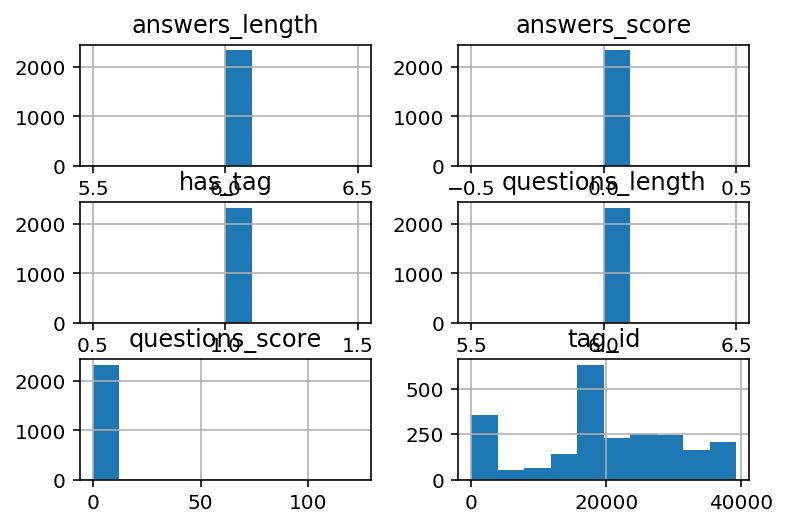

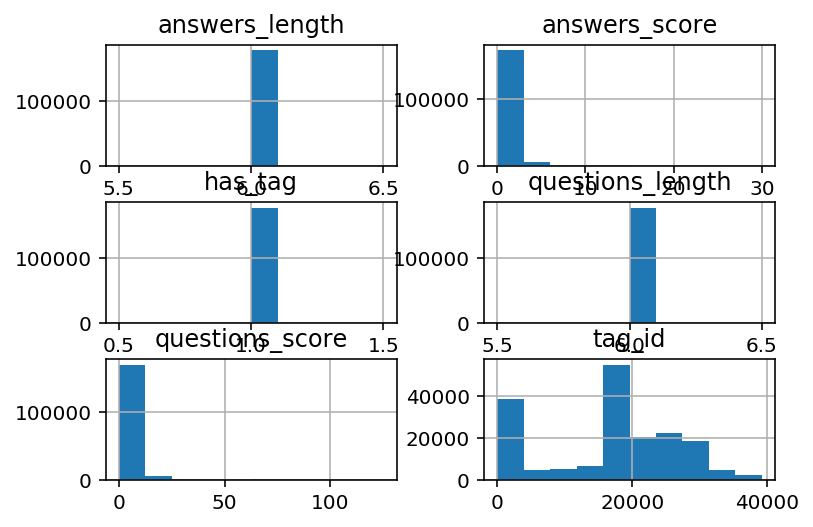

In [6]:
# data.groupby('qa_match').hist();

#### Filling Nulls

I noticed there are still some null values, though we inputed some values in the cleaning notebook, we needed further EDA to understand how inpute nulls inpacts the data. For now, we're just filling the 24 null values in `answers_body` with the string 'none'. Since this is such a small fraction of the data, it shouldn't have a significant impact on results.

In [12]:
data.isnull().sum()

questions_id               0
questions_author_id        0
questions_date_added       0
questions_title            0
questions_body             0
questions_score            0
tag_id                     0
tag_name                   0
answers_id              2340
answers_author_id       2340
answers_date_added      2340
answers_body               0
answers_score              0
qa_match                   0
questions_length           0
answers_length             0
has_tag                    0
questions_sentiment        0
answers_sentiment          0
dtype: int64

In [4]:
data['answers_body'].fillna("none", inplace=True)

## How does the sentiment of the question affect it's liklihood of being answered?
## How does the sentiment of the answer affect the score the answer recieves? 

In order to delve into these two questions we're using NLTK's Sentiment Insensity Analyzer to get the sentiment score of  `questions_body` and  `answers_body`. Scores range from -1 to 1, with 1 being positive and -1 being negative. An example of positive words would be "like", "love", "appreciate" while negative words would be "hate", "dislike", "frustrated" etc.



#### Instantiating SentimentInsensityAnalyzer() and Creating a Function get_compound_sentiment()

When called, it calculates the sentiment score for each row in the passed columns

In [7]:
sia = SentimentIntensityAnalyzer()

def get_compound_sentiment(post):
    return sia.polarity_scores(post)['compound']

#### Creating a columns with sentiment scores
that was produced by mapping the answers from the get_compount_sentiment() function

In [11]:
data['questions_sentiment'] = data['questions_body'].apply(get_compound_sentiment)
data['answers_sentiment'] = data['answers_body'].apply(get_compound_sentiment)

To get an idea of the distrition of Sentiment Scores, we're plotting a histogram with Count on the y-axis and sentiment score on the x-axis

#### Graphing Answers Sentmient Scores:

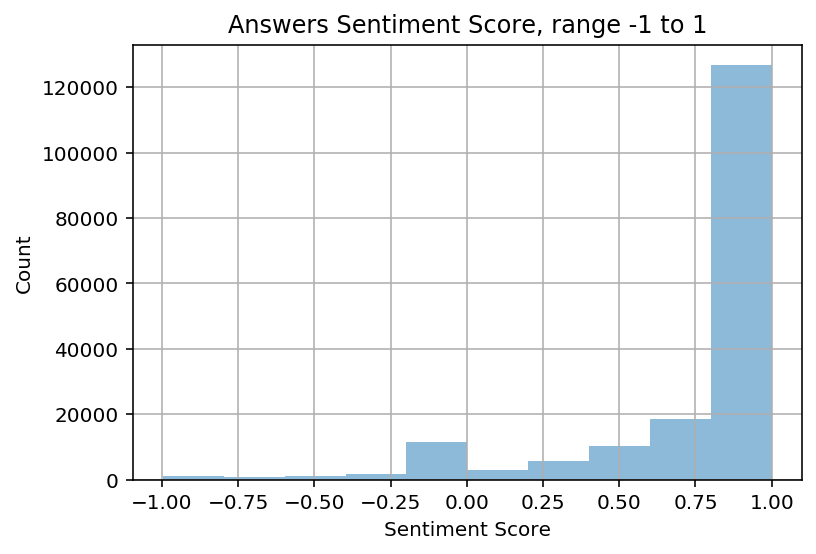

In [14]:
#Overall
data['answers_sentiment'].hist(alpha=.5);
plt.title('Answers Sentiment Score, range -1 to 1');
plt.ylabel("Count")
plt.xlabel("Sentiment Score");

#### Graphing Questions Sentiment Scores

We also included on the graph the number of questions that were and were not answered

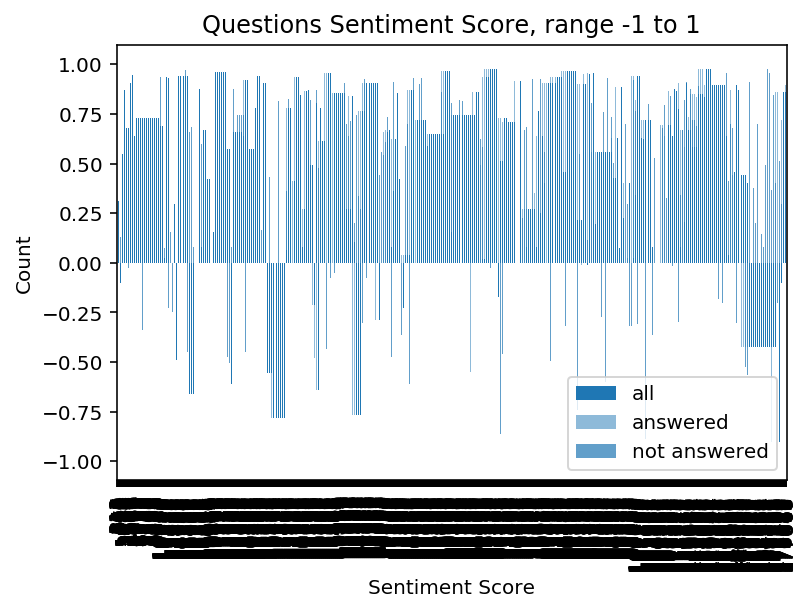

In [15]:
data['questions_sentiment'].plot(kind = 'bar', label="all");
plt.title('Questions Sentiment Score, range -1 to 1');
plt.ylabel("Count")
plt.xlabel("Sentiment Score");

#was answered
data[data['qa_match'] == 1]['questions_sentiment'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['qa_match'] == 0]['questions_sentiment'].plot(kind = 'bar', alpha = .7, label='not answered');
plt.legend();

#### Graphing the Distribution Scores from the Questions 

In [16]:
data['questions_score'].plot(kind = 'bar', label="all");
plt.title('Questions Score');
plt.ylabel("Count")
plt.xlabel("Questions Score");

#was answered
data[data['qa_match'] == 1]['questions_score'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['qa_match'] == 0]['questions_score'].plot(kind = 'bar', alpha = .7, label='not answered');
plt.legend();

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11caa8e60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11cd29440> (for post_execute):


KeyboardInterrupt: 

#### Graphing the Distribution of the Scores from Questions 

In [ ]:
data['answers_score'].plot(kind = 'bar', label="all");
plt.title('Answers Score');
plt.ylabel("Count")
plt.xlabel("Answers Score");

#was answered
data[data['qa_match'] == 1]['Answers_score'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['qa_match'] == 0]['Answers_score'].plot(kind = 'bar', alpha = .7, label='not answered');
plt.legend();

#### Checking the distribution of answers that were and were not answered

No handles with labels found to put in legend.


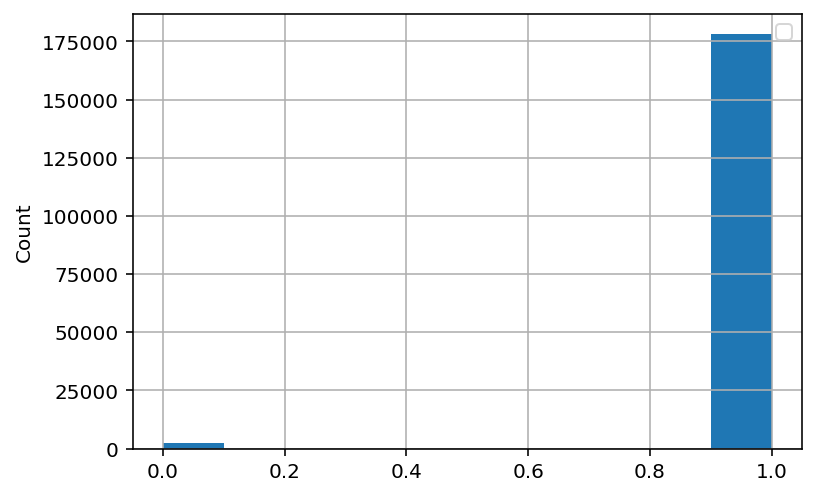

In [18]:
data['qa_match'].hist()
plt.ylabel("Count")
plt.legend();

In [23]:
data['answers_author_id'].nunique()

10169

In [38]:
data.groupby('answers_author_id').mean().sort_values('answers_score', ascending=False).head(1020)

,questions_score,tag_id,answers_score,qa_match,questions_length,answers_length,has_tag
answers_author_id,,,,,,,
4dbdd4b99f80446798b3ab477f049285,9.000000,9181.000000,11.000000,1,180376,180376,1
c97347e2441b40a69577cf1627b81a6a,16.875000,10614.125000,10.625000,1,180376,180376,1
a61aa494aed848cc87ba745a24178922,16.428571,15048.000000,9.714286,1,180376,180376,1
1ec14aee9311480681dfa81b0f193de8,15.200000,9751.500000,9.100000,1,180376,180376,1
bdcdf938f015413fb3cb981836ca3dab,24.000000,14096.000000,9.000000,1,180376,180376,1
...,...,...,...,...,...,...,...
dfffd276cafe415e9ab18a0ad5564a9c,10.000000,13367.400000,1.028571,1,180376,180376,1
2796213fb0324530bb206915156dd136,3.777778,15320.027778,1.027778,1,180376,180376,1
2f152a99afa744e08f24a389ee3f9566,2.375000,20948.750000,1.000000,1,180376,180376,1


# Viewing the correlation of the numeric columns to `qa_match`

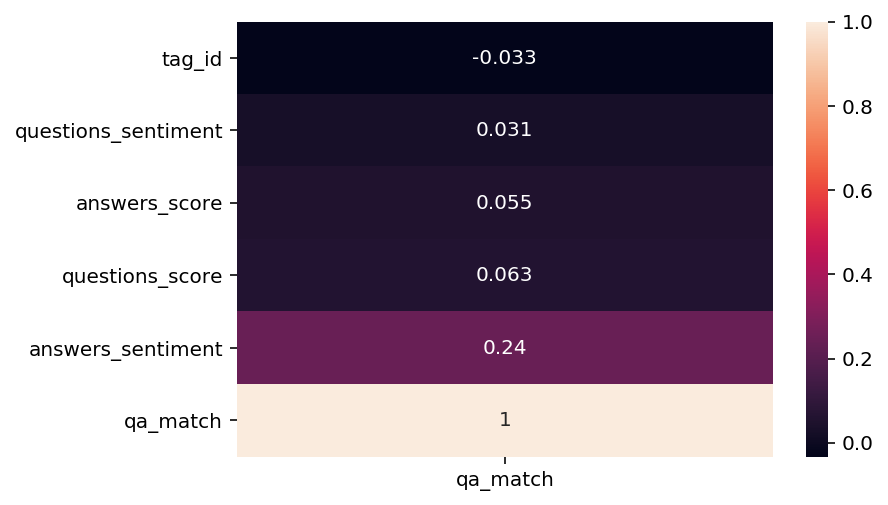

In [20]:
qa_corr = data.corr()[['qa_match']].dropna().sort_values('qa_match')

sns.heatmap(qa_corr, annot=True);

## <span style = 'color:red'> It'd be interesting to see if the tags the professionals use are the tags that the questions get answered

---
---
---
# <span style = 'color:red'> Basic Cleaning Done, this might be a good place to break up the notebook. But maybe not. 

In [ ]:
#### Defining a tokenizer function



In [ ]:
tokenizer = RegexpTokenizer(r'\s+', gaps=True)

def tokenizing_function(df, df_col):
    '''
    df: the name of the dataframe
    df_col: The column name formatted as a string 
    i.e. tokenizing_function(data, "answers_body")
    
    This function takes in the dataframe and a column name, 
    concatenates all the cells together into one long string 
    and tokenizes the column using Regex's Tokenizer.
    '''
    

    string = '' # We start off with an empty string
    
    # We use try and except to run this function so that if there is a null cell the function won't break
    
    try:
        for post in df[df_col]:
            string += ' ' + post # we're concatenating all the cells together into one string 
    except:
        pass
    
    return tokenizer.tokenize(string)

In [ ]:
text_cols

#### Tokenizing `text_cols`

Since we want to preform NLP and later modeling, we need to tokenizes the text columns. We're saving each as a variable

In [ ]:
answ_tokens = tokenizing_function(data, "answers_body")
ques_tokens = tokenizing_function(data, "questions_body")
ques_title_tokens = tokenizing_function(data, "questions_title")
tag_tokens = tokenizing_function(data, "tag_name")

#### Creating a CountVectorizer Function

In [ ]:
cvec = CountVectorizer(stop_words= 'english', min_df=5)

def cvec_function(df_col):
    cvec_matrix = cvec.fit_transform(df_col)

    #Convert to DataFrame
    return pd.DataFrame(cvec_matrix.toarray(),
                          columns=cvec.get_feature_names())
#     return cvec_df # if this doens't work, we can then save pd.Data from as cvec_df and just return that.

In [ ]:
data['answers_score'].value_counts()

In [ ]:
data.tag_name.value_counts().sort_values().tail(20)

## Exporting Data

In [21]:
data.to_csv('./Datasets/cleaned_w_sentiment.csv', index=False)